In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import math

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
camera_man_image_path = 'images/cameraman.jpg'
church_image_path = 'images/Church.jpg'
road_image_name = 'images/linesOnTheRoadGray.jpg'

In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.8.8
Numpy version:  1.20.1


## <span style="color:black">Section A: Convolution (16 pt)
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of an image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Additional_examples in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases: 
    
1. Mask1:  a convolution mask (kernel)  that computes the sum of a 3x5 pixels around each pixel (height 3 and width 5). 
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a white non-symmetric   **'+'** shape region surrounded by black pixels (see the region below).  Note, the rest of the image may contain any values.

    The  '+' shape region:\
    ``
     0    0    0    0    0 
    0    0   255   0    0 
    0   255  255  255  255 
    0    0   255   0    0 
    0    0    0    0    0    ``
     

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:\
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    0    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 2 pixel shift of the image to the left.\
    You can ignore the results along the border of the image.

**Submit your function below and the masks and results either below or in the PDF file**. 


In [4]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)
    
    convolvedImage2 = convolutionMask(img,mask2)
    
    convolvedImage3 = convolutionMask(img,mask3)
        
    convolvedImage4 = convolutionMask(img,mask4)
    

In [5]:
#I plot the image outside the function since I am suing it in diffrent places.

def convolutionMask(img, mask):
    # Your implementation
    return convolve2d(img, mask, mode='same')

In [6]:
# Masks:

#1
mask1 = np.flip(np.ones(shape =(3,5)), None)

#2
mask2 = np.full(fill_value = -1, shape=(5,5))
mask2[1][2] = 1
mask2[2][1:] = 1
mask2[3][2] = 1
mask2 = np.flip(mask2)
#3
mask3 = np.full(fill_value = -1, shape=(5,5))
mask3[1][2] = 1
mask3[1][1] = 0
mask3[1][3] = 0
mask3[2][1:] = 1
mask3[3][2] = 1

mask3 = np.flip(mask3)

#4
mask4 = np.flip(np.array([[0, 0, 0,0,0], [0,0, 0, 0, 1], [0,0,0,0,0]]), axis=None)


In [7]:
# img = load your image here
# test_A(img)

# print and check your results - advicing you to check your code on trivial problems (toy problems)

def run_convolution_and_plot(img, mask, title):
    
    convolvedImage = convolutionMask(img, mask)
    
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(26, 12))
    
    f.suptitle(title, fontsize=24)
    
    axarr[0].imshow(img)
    axarr[0].title.set_text('Original Image')

    axarr[1].title.set_text('Convolved Image')
    axarr[1].imshow(convolvedImage)


<Figure size 576x576 with 0 Axes>

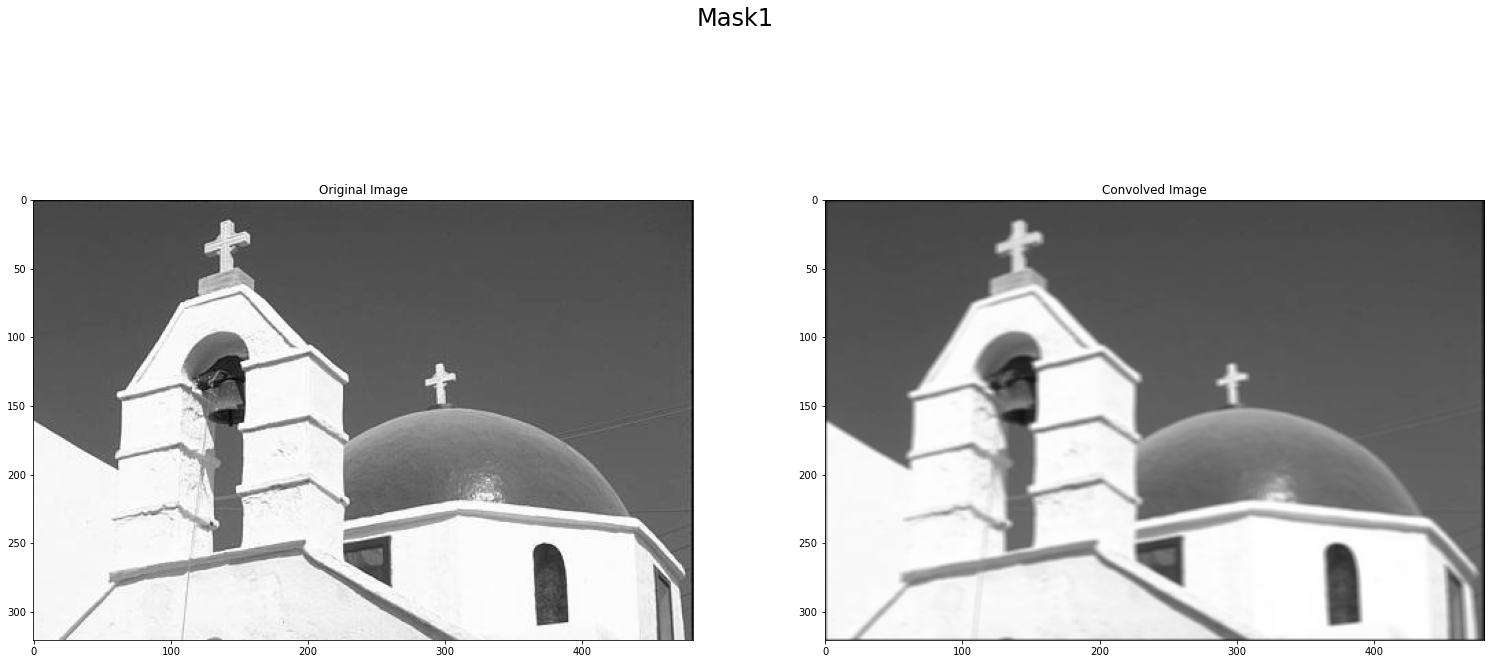

In [8]:
img = cv2.imread(church_image_path, cv2.IMREAD_GRAYSCALE)
run_convolution_and_plot(img, mask1, "Mask1")

<Figure size 576x576 with 0 Axes>

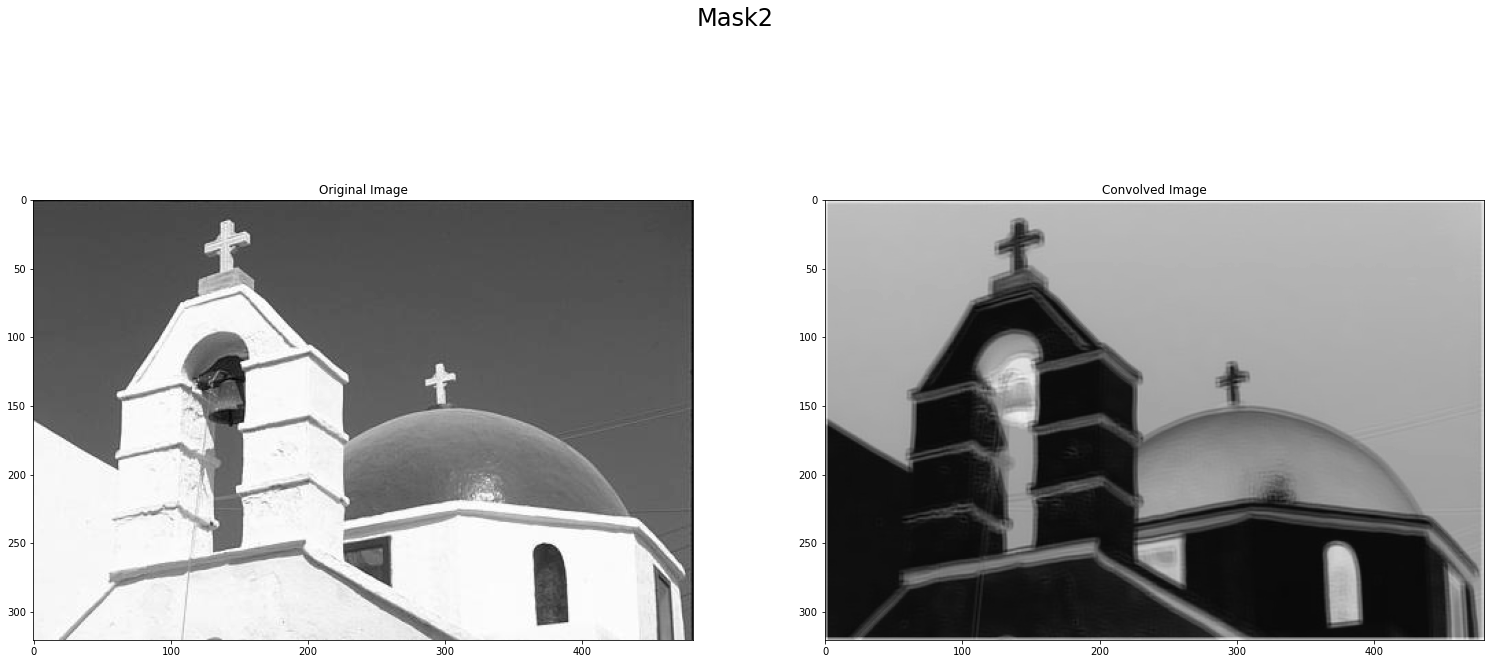

In [9]:
img = cv2.imread(church_image_path, cv2.IMREAD_GRAYSCALE)
run_convolution_and_plot(img, mask2, "Mask2")

<Figure size 576x576 with 0 Axes>

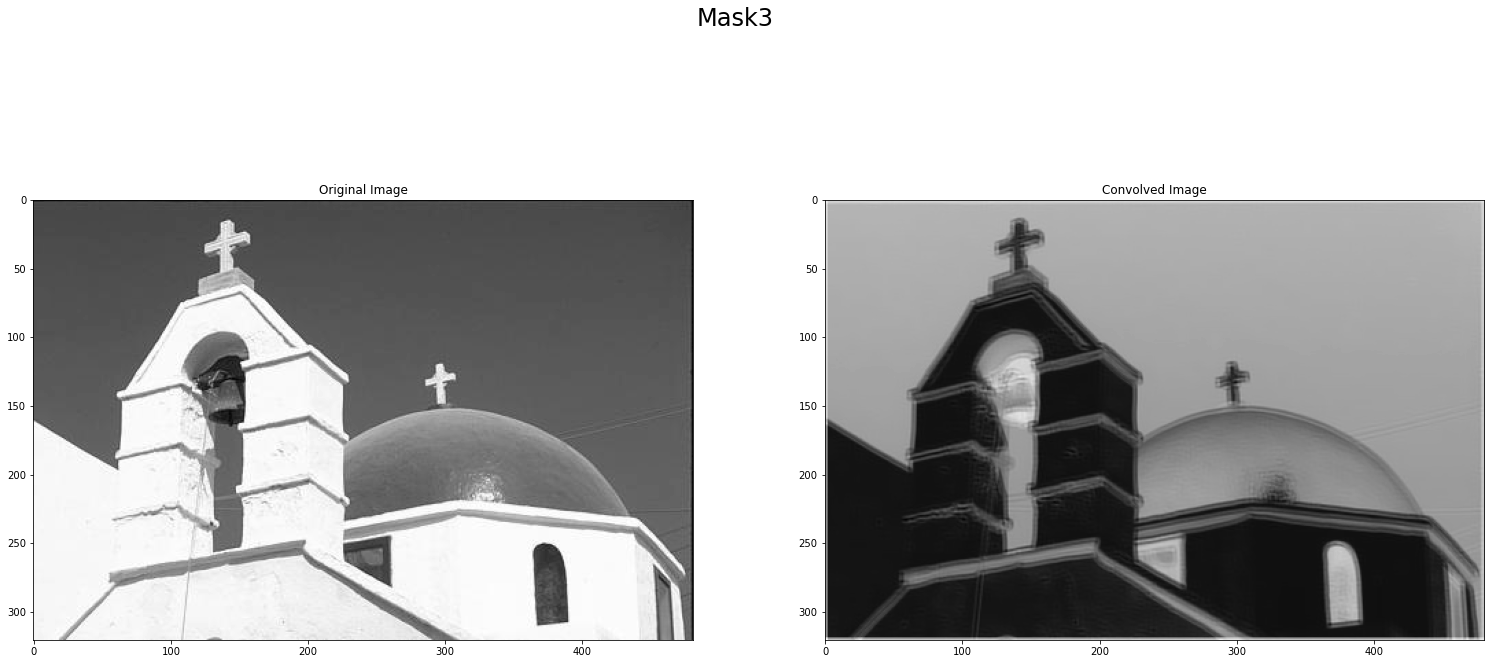

In [10]:
img = cv2.imread(church_image_path, cv2.IMREAD_GRAYSCALE)
run_convolution_and_plot(img, mask3, "Mask3")

<Figure size 576x576 with 0 Axes>

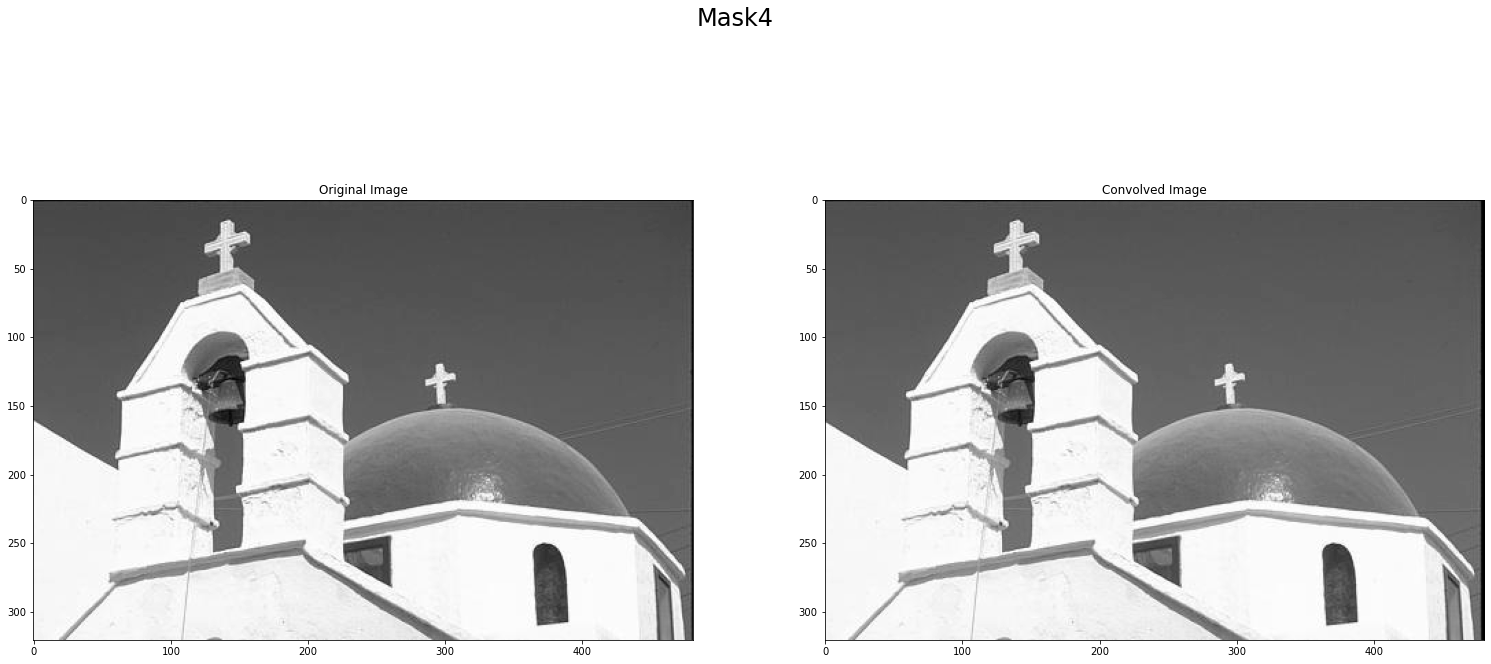

In [11]:
img = cv2.imread(church_image_path, cv2.IMREAD_GRAYSCALE)
run_convolution_and_plot(img, mask4, "Mask4")

## <span style="color:black"> Section B: Edge Detector (50 pt)

In this section, you will implement the classic Canny edge detector and Sobel edge detector, apply them and explore their paremeters. 

Reference: 
[F. J. Canny. A computational approach to edge detection. IEEE Trans. Pattern Analysis and Machine Intelligent (PAMI), 8(6):679-698, 1986.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4767851&casa_token=-KErvLLfyjQAAAAA:-Q-efDIF1sM3mJBrQfCZnqaPYftS4IspVi_9NR7kfmdx8AnFFmKSy5HnRjk2PpHpNR0VUOsw-ML4fw)


## <span style="color:black"> **B1 - Implement Canny**  
Write the function: **CannyEdges = Canny(img, sigma, L_th, H_th)**
- The output is a binary image: 1 for an edge pixel and 0 for the rest.
- Following are the function parameters:
    - *img*: a 2D array  that contains a  grey-level image. 
    - *sigma*: the gaussian std. 
    - *L_th*, *H_th*: the Low and high threholds of the algorithm.

Use the following steps:

1. Compute two kernels with the derivative of a Gaussian: G_dx, G_dy  = Deriv_Gauss_xy(sigma).\
   **Note**:\
    (i) See an example of how to define a mask given a function in  'AddionalExamples.ipynb'.\
    (ii) The mask_size should be around 6$\sigma$+1.\
    You can check and see if smaller or larger mask size affect the results.
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img, sigma)**

3. Compute two matrices *G_orientation* and *G_magnitute* with the gradient  orientation and magnitude at each pixel:\
    **G_orientation, G_magnitude = Grad_orient_mag(Ix,Iy)**

4. Compute non-maximum suppression (thinning) into a matrix:\
    **G_thin = non_maximum_supression(G_magnitude, G_orientation)** 

    **Note**: For computing non-maximum suppression, edge orientation should be rounded to be one of four orientations:
    Gradients that are approximately horizontal, approximately vertical, and approximately one of the diagonals (see figure). ![](NMS-orientation.jfif)

5. Edge Tracking by Hysteresis: use the two thresholds, *L_th*, *H_th*, to put it all together and compute the canny edge detector. \
    The output should be a binary map where an edge pixel is 1 and the rest are 0:\
    **E = DoubleThreshold(L_th, H_th)** \
In order to get full credit, you will need to find an  **efficient vectorization code** (a single loop may be used only over edge pixels).  
**Hint**: For efficient vectorized code of the DoubleThreshold, you may want to use: (i) image threshold function; (ii) dilate function ; (iii) add images; (iv)  the function cv2.connectedComponents(img, connectivity=8). See slides of Class 2.



**Submit your functions and an example of one of the images**.

The desire output should look like that: <img src="canny_example.png" style="margin-left:auto; margin-right:auto"/>


In [12]:
# # Section B

def Deriv_Gauss_xy(sigma):
    size = sigma*6+1
    ax = np.linspace(-(size-1)/2,(size-1)/2,int(size))
    x, y = np.meshgrid(ax,ax)
    G_dx = ((-x)/2*np.pi*sigma**4)*np.exp(-(np.square(x)+np.square(y))/(2*sigma**2))
    G_dy = ((-y)/2*np.pi*sigma**4)*np.exp(-(np.square(x)+np.square(y))/(2*sigma**2))
    return G_dx,G_dy

def Grad_xy(img,gdx,gdy):
    ix = abs(convolve2d(img, gdx, mode='same'))
    iy = abs(convolve2d(img, gdy, mode='same'))
    return ix, iy

def Grad_orient_mag(Ix,Iy):
    G_magnitude = np.sqrt(Ix**2+Iy**2)
    G_orientation = (np.arctan2(Iy,Ix)*180)/np.pi
    return G_orientation,G_magnitude

def non_maximum_supression(G_magnitude,G_orientation):

    # Calculate approximate angles (0,45,90,135) for the Gradient
    G_oriAprox = np.copy(G_orientation)
    # turn all negative degrees to their positive counterpart since we dont care about the direction of the angle
    G_oriAprox[G_oriAprox<0] += 180
    G_oriAprox[(0<=G_oriAprox) & (G_oriAprox<=22.5)] = 0
    G_oriAprox[(157.5<G_oriAprox)&(G_oriAprox<=180)] = 0
    G_oriAprox[(22.5<G_oriAprox)&(G_oriAprox<=67.5)] = 45
    G_oriAprox[(67.5<G_oriAprox)&(G_oriAprox<=112.5)] = 90
    G_oriAprox[(112.5<G_oriAprox)&(G_oriAprox<=157.5)] = 135
    
    # for every degree posibility we get matrix of all pixels with that gradient orientation
    GOri0 = np.zeros(G_orientation.shape)
    GOri45 = np.zeros(G_orientation.shape)
    GOri90 = np.zeros(G_orientation.shape)
    GOri135 = np.zeros(G_orientation.shape)
    GOri0 = G_oriAprox == 0
    GOri45 = G_oriAprox == 45
    GOri90 = G_oriAprox == 90
    GOri135 = G_oriAprox == 135
    
    # Set up masks to shift the gradient magnitude matrix in all 4*2=8 directions
    shift0R = np.zeros((3,3))
    shift0R[1, 0] = 1
    shift0L = np.zeros((3,3))
    shift0L[1, 2] = 1
    shift45R = np.zeros((3,3))
    shift45R[0,0] = 1
    shift45L = np.zeros((3,3))
    shift45L[2,2] = 1
    shift90R = np.zeros((3,3))
    shift90R[0,1] = 1
    shift90L = np.zeros((3,3))
    shift90L[2,1]=1
    shift135R = np.zeros((3,3))
    shift135R[2,0]=1
    shift135L = np.zeros((3,3))
    shift135L[0,2]=1
    
    # convolude the mask with the magnitude matrix and get 
    # that Gm0R[i,j] is the right neigbour of pixel i,j in the 0 degree line to the right, and so on
    Gm0R = convolve2d(G_magnitude,shift0R, mode='same')
    Gm0L = convolve2d(G_magnitude,shift0L, mode='same')
    Gm45R = convolve2d(G_magnitude,shift45R, mode='same')
    Gm45L = convolve2d(G_magnitude,shift45L, mode='same')
    Gm90R = convolve2d(G_magnitude,shift90R, mode='same')
    Gm90L = convolve2d(G_magnitude,shift90L, mode='same')
    Gm135R = convolve2d(G_magnitude,shift135R, mode='same')
    Gm135L = convolve2d(G_magnitude,shift135L, mode='same')

    # Get only the neighbours in the correct direction according the the gradient orientation
    GmO0R = np.multiply(Gm0R, GOri0)
    GmO0L = np.multiply(Gm0L, GOri0)
    GmO45R = np.multiply(Gm45R, GOri45)
    GmO45L = np.multiply(Gm45L, GOri45)
    GmO90R = np.multiply(Gm90R, GOri90)
    GmO90L = np.multiply(Gm90L, GOri90)
    GmO135R = np.multiply(Gm135R, GOri135)
    GmO135L = np.multiply(Gm135L, GOri135)

    # Sum all right and left neighbours
    GmR = GmO0R + GmO45R + GmO90R + GmO135R
    GmL = GmO0L + GmO45L + GmO90L + GmO135L

    # Create a 3D matrix with right neighbours mag, pixel mag, left neighbours mag
    GmN = np.stack([GmL,G_magnitude,GmR], axis=1)
    # Get the maximum mag between the pixel and his neighbours
    GmMax = GmN.max(axis=1)
    Gthin = GmMax
    # if the max mag is greater than the pixel we set it to 0 in the thin edge
    Gthin[Gthin>G_magnitude] = 0
    # normalize the edges to be between 0 and 255
    Gthin = (Gthin/Gthin.max())*255
    return Gthin

def DoubleThreshold(G_thin, L_th, H_th):
    # Eh is all the edges above the high threshold
    Eh = G_thin >= H_th
    # El is all the edges below the low threshold
    El = G_thin< L_th
    # Ehml is all the edges that are between the high and low thresholds
    Ehml = np.ones(G_thin.shape) - El - Eh
    # Set the diliate kernal to diliate by 1 pixel
    diliateKer = np.ones((3,3),np.uint8)
    # Diliate Eh by 1 pixel for every side, including corners
    Ehdilate = cv2.dilate(Eh.astype(np.uint8),diliateKer)
    # N will have 2 if the pixel mag is between the high and low thresholds and is next to a pixel above the high threshold
    N = Ehdilate + Ehml
    _,Chml = cv2.connectedComponents(Ehml.astype(np.uint8),connectivity=8)
    # We get all the connected pixels of every pixel that N[pixel] = 2
    ConnectedToAdd = np.isin(Chml,np.unique(Chml[N==2]))
    # Add all of those pixels to the pixel above the high threshold
    EhNew = Eh + ConnectedToAdd
    return EhNew

# Section B

def canny(imageName, sigma, L_th, H_th):
    
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    
    return canny_on_image(img, sigma, L_th, H_th)

def canny_on_image(img, sigma, L_th, H_th):
    
    G_dx, G_dy  = Deriv_Gauss_xy(sigma)
        
    Ix, Iy = Grad_xy(img, G_dx, G_dy)
    G_orientation, G_magnitude = Grad_orient_mag(Ix,Iy)
    
    G_thin = non_maximum_supression(G_magnitude, G_orientation)
    
    E = DoubleThreshold(G_thin,L_th,H_th)
    
    return E


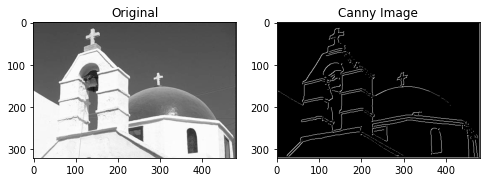

In [21]:
def show_canny(imgName,sigma,L_th,H_th,title='Canny'):
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    resultCanny = canny(imgName,sigma, L_th, H_th)
    f,ax=plt.subplots(1,2,sharex='row',sharey='col')
    ax[0].imshow(img,cmap='gray'),ax[0].set_title('Original')
    ax[1].imshow(resultCanny,cmap='gray'),ax[1].set_title(title)
    plt.show()

show_canny(church_image_path,2,25,50, 'Canny Image')

## <span style="color:black"> **B2 - Apply and explore**. 
In this part you will apply your Canny edge detector and explore its parameters 

1. Test your functions on an image you choose. Explore various parameters and choose a set such that the result  looks “good”.  \
    **Submit in the below or at the pdf file**: display the image you choosed, its edges, and the parameters you used.

2. Explore with different sets of parameters **sigma ,L_th, H_th**. 
3. Assume you run the canny edge detector on the same image once with the set of parameters **sigma1 ,L_th1, H_th1** and once with the set of parameters **sigma2 ,L_th2, H_th2**. The obtained results are E1 and E2, respectively.
Answer true or false, give a short explanation to your answer and give an example for each of the cases:\
   a. **True / False** When *sigma1 > sigma2*, *L_th1 = L_th2*, and *H_th1 = H_th2* - the location of the edges in E1 is more accurate than those in E2. \
   b. **True / False** When *sigma1 = sigma2*, *L_th1 > L_th2*, and *H_th1 = H_th2* - the edges in E1 are longer than in E2. \
   c. **True / False** When *sigma1 = sigma2*, *L_th1 = L_th2*, and *H_th1 < H_th2* - there are more edges in E1 than in E2. \
   d. **True / False** It is possible to find two sets *sigma1, L_th1, H_th1* and *sigma1, L_th1, H_th1* such that E1 has no edges while E2 contains edges.
   
4. Implement Sobel edge detector **SobelEdges = SobelEdge(img, th)**. 
5. Choose an image and a set of parameters for the Canny and for the Sobel edge detectors, that demostrate differences between the two edge maps. Explain what is the diffrence between the two esge maps. 
6. Theoretical question: explain which parts of the Canny algorithm, its implementation can be parallelized.    

    **Submit below or in the pdf file**


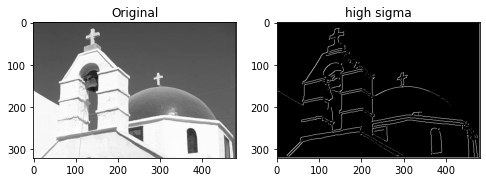

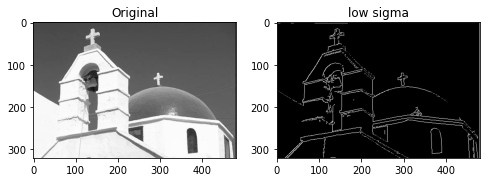

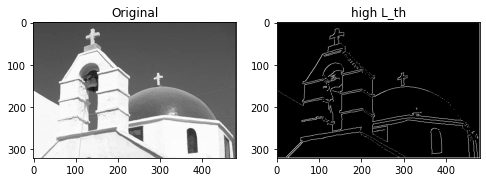

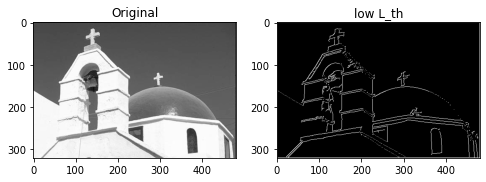

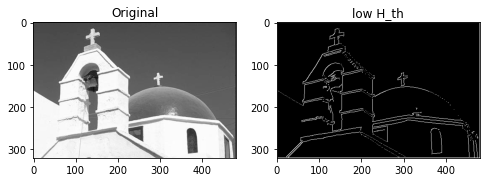

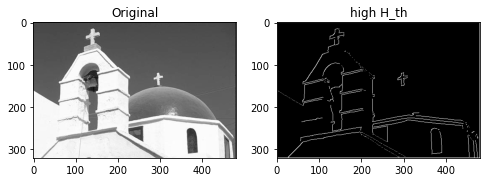

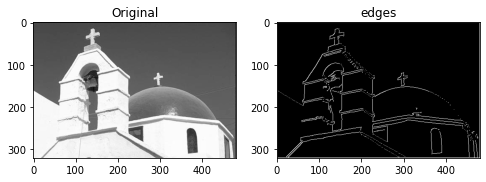

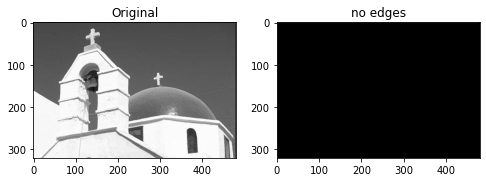

In [22]:
# a
# sig1>sig2
show_canny(church_image_path,2,25,50,'high sigma')
show_canny(church_image_path,0.3,25,50,'low sigma')
#false.
#small values will allow us to detect sharp intensity 
#transitions and a large value  to detect gradual transitions.
#we cant tell shich is more accurate, since ot dependes on the images domain.




#b
#l_th1>l_th2
show_canny(church_image_path,1.3,25,50,'high L_th')
show_canny(church_image_path,1.3,2,50,'low L_th')
#b
# false: with lower L_th we will get more pixels above that are next to pixels above H_th
# so there will be more pixels we consider edges and longer edges


#c
#H_th1<H_th2
show_canny(church_image_path,1.3,25,50,'low H_th')
show_canny(church_image_path,1.3,25,100,'high H_th')
#True, since more pixel have larger value than the high threshold.
#so we will have more strong pixels and it will also lead to more weak pixels.


#d
# E1 has edges,E2 doesnt have edges
show_canny(church_image_path,1.3,25,50,'edges')
show_canny(church_image_path,1.3,25,254,'no edges')
#True, when I set high threshold to be 0.99 there are no string edges in the  image.
#and if we dont have string edges we will also not have weak edges.


<Figure size 576x576 with 0 Axes>

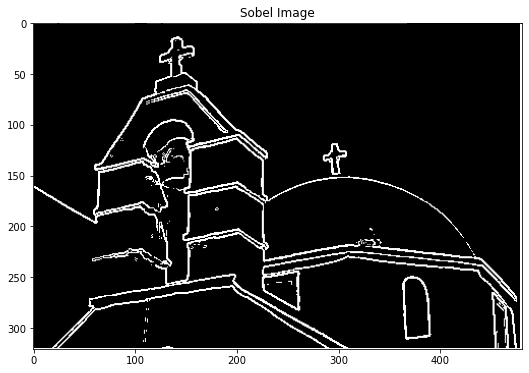

In [15]:
def SobelEdge(img, th):
    
    Cx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Cy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Gy = convolve2d(img, Cx, mode='same')
    Gx = convolve2d(img, Cy, mode='same')
    G = np.hypot(Gx, Gy)
    G = G / G.max() * 255
    image_threshold = G.max() * th;
    egde_pixels = np.where(G >= image_threshold)
    edges_image = np.zeros_like(G)
    edges_image[egde_pixels] = 1
    
    return edges_image


img = cv2.imread(church_image_path, cv2.IMREAD_GRAYSCALE)


filtered_image = SobelEdge(img, 0.2)

plt.figure()
f, axarr = plt.subplots(1,1, figsize=(13, 6))

axarr.imshow(filtered_image)
axarr.title.set_text('Sobel Image')


## Section C:  Hough transform for detecting straight lines
Hough Transform  (34 pt) 

In this section, you will learn how to find straight lines in an edge image using hough transform  [Duda and Hart, 1972](http://www.ai.sri.com/pubs/files/tn036-duda71.pdf). 

The basic idea is to use voting process for detecting all possible straight lines within the edge map of an image, despite outliers and imperfect straight lines. You can implement it yourself or use the implementation from  https://alyssaq.github.io/2014/understanding-hough-transform/ \
(Use the basic hough transform and not its extensions.)

1. (7pt) Apply the hough transform to images: "linesOnTheRoadGray.jpg"
 <img src="linesOnTheRoadGray.jpg" style="margin-left:auto; margin-right:auto; width: 200px;"/>

2. (10pt) Write a function that computes the  longest straight line in an image, and display it overlay on the original image.\
    **length = longest_straight_line(img, paramerts).** 
3. (10pt) Suggest an algorithm that detects the dashed and the solide road lines from a road image. Give a high level description of your algorithm.\
4. (7pt)Implement the algorithm you suggested in 3 and show its results on the given image. 
**Hint:** Pay attention to how many edges you expect on each part of the line.

In [16]:
# Section C

def hough_line(img):
  # Rho and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width, height = img.shape
  diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
  rhos = np.linspace(int(-diag_len), int(diag_len), int(diag_len) * 2)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * int(diag_len), num_thetas), dtype=np.uint64)
  y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[int(rho), t_idx] += 1

  return accumulator, thetas, rhos



def run_hough_line(img, Par):
    filtered_image = canny_on_image(img, Par['sigma'], Par['L_th'], Par['H_th'])
    return hough_line(filtered_image)
    

def longest_straight_line(img, Par):
    
    accumulator, thetas, rhos = run_hough_line(img, Par)
    idx = np.argmax(accumulator)
    rho = rhos[int(idx / accumulator.shape[1])]
    theta = thetas[idx % accumulator.shape[1]]
    
    #average
    mask_line = np.flip(np.full(shape =(3,3), fill_value=1/9))
    accumulator = convolutionMask(accumulator, mask_line)
    
    idx = np.argmax(accumulator)
    max_length =  np.max(accumulator)
    
    rho = rhos[int(idx / accumulator.shape[1])]
    theta = thetas[idx % accumulator.shape[1]]
    
    
    xs = []
    ys = []
    for x in range(img.shape[1]):
    
        for y in range(img.shape[0]):
        
            f1 = - (x * (math.cos(theta)))/math.sin(theta)
            f2 = rho/math.sin(theta)
            yy = f1 + f2
            xs.append(x)
            ys.append(int(yy))

    plt.plot(xs, ys, color="red", linewidth=3)
    plt.imshow(img)
    plt.title("Longest Line Length {}".format(max_length))
    plt.show()
    
    return max_length



In [17]:
Par = {'sigma':1.3, 'L_th': 25, 'H_th': 50}
img = cv2.imread(road_image_name, cv2.IMREAD_GRAYSCALE)
accumulator, thetas, rhos = run_hough_line(img, Par)

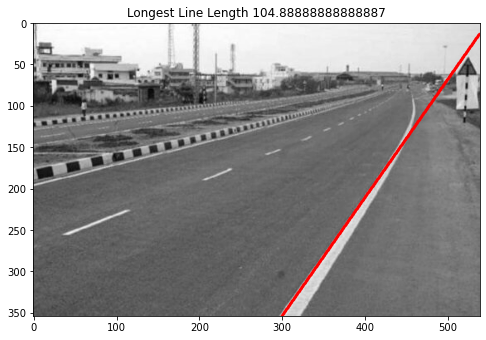

In [18]:
#2
# write here code that calls the function with your desire parameters and answer the open questions


# #Since we are working on edges image,
# #I consider the longest line to be the line with the lagest value in the accumulator table
#because is means it has the largest number of edges pixels
img = cv2.imread(road_image_name, cv2.IMREAD_GRAYSCALE)

Par = {'sigma':1.3, 'L_th': 25, 'H_th': 50}
longest_length = longest_straight_line(img, Par)

#3 
My algorithm is the follwoing:

1. run canny to get edges image.
2. convolution with eye mask of 25 * 25 with 1 in the diagonal and -1 elsewhere.
3. threshold of 0 for white pixel vs black pixel.
4. mask of 9*9 to get pixel value from his heighbors(equal weight of 1).
5. threshold for white/black pixel (pixels ion white area will have higher values)
6. average pixel value by his 9 neighbors using 3*3 mask with 1/9 values.


    

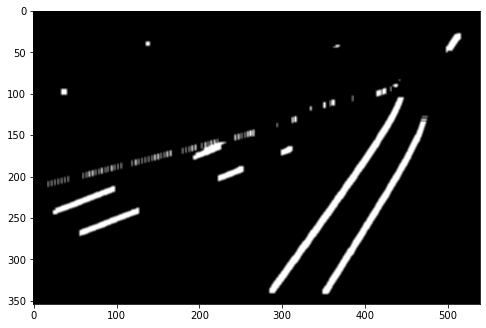

<Figure size 576x576 with 0 Axes>

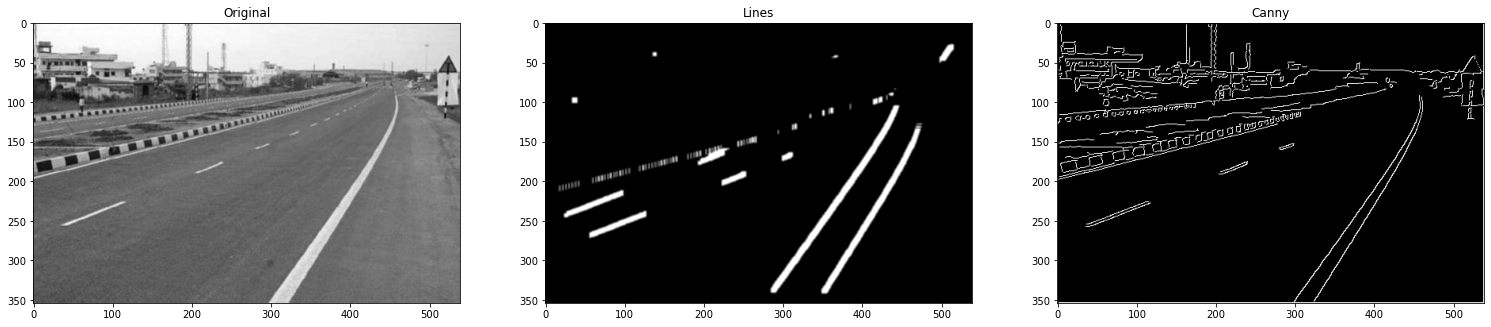

In [19]:

def find_solid_and_dashed_road_lines(img, Par):
    
    filtered_image = canny_on_image(img, Par['sigma'], Par['L_th'], Par['H_th'])

    line_mask =  np.eye(25)
    line_mask = np.flip(np.where(line_mask != 1, -1, 1))
    roads = convolutionMask(filtered_image, line_mask)
    
    roads = np.where(roads > 0, 255, 0)

    ids= np.where(roads >0)
    mask = np.ones(shape=(9,9))
    mask = np.flip(mask)
    roads = convolutionMask(roads, mask)
    roads = np.where(roads > 700, 255, 0)

    m = np.full(shape=(3,3), fill_value=1.0/9.0)
    roads = convolutionMask(roads, np.flip(m))

    plt.imshow(roads)
    plt.show()

    return roads, filtered_image, img

img = cv2.imread(road_image_name, cv2.IMREAD_GRAYSCALE)
Par = {'sigma':1.3, 'L_th': 25, 'H_th': 50}
roads12, filtered_image, img = find_solid_and_dashed_road_lines(img, Par)

plt.figure()
f, axarr = plt.subplots(1,3, figsize=(26, 12))

axarr[0].title.set_text('Original')
axarr[0].imshow(img)

axarr[1].imshow(roads12)
axarr[1].title.set_text('Lines')


axarr[2].title.set_text('Canny')
axarr[2].imshow(filtered_image)

    

In [ ]:
# This code is for the TA - you might want to use it for your debugging

if __name__ == "__main__":
    #test A
    imageName = './images/cameraman.jpg'
    test_A(imageName)

    synthName = './images/synthCheck.tif'
    test_A(synthName)
    
    #test B
    imageName = './images/Church.jpg'
    sigma, L_th, H_th  = 1.3, 0.1 , 0.15
    resultCanny = canny(imageName,sigma, L_th, H_th)

  